In [1]:
from tensorflow import keras
import sys
sys.path.append('../')

from hydra import initialize, compose

init = initialize('../src/conf/')

In [2]:
from src.image_model import build_model

cfg = compose(config_name='train_image_only.yaml')

In [3]:
model = build_model(cfg)

/opt/miniconda/envs/ai4covid/lib/python3.6/site-packages/keras/applications/imagenet_utils.py:333: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  str(input_shape[-1]) + ' input channels.')


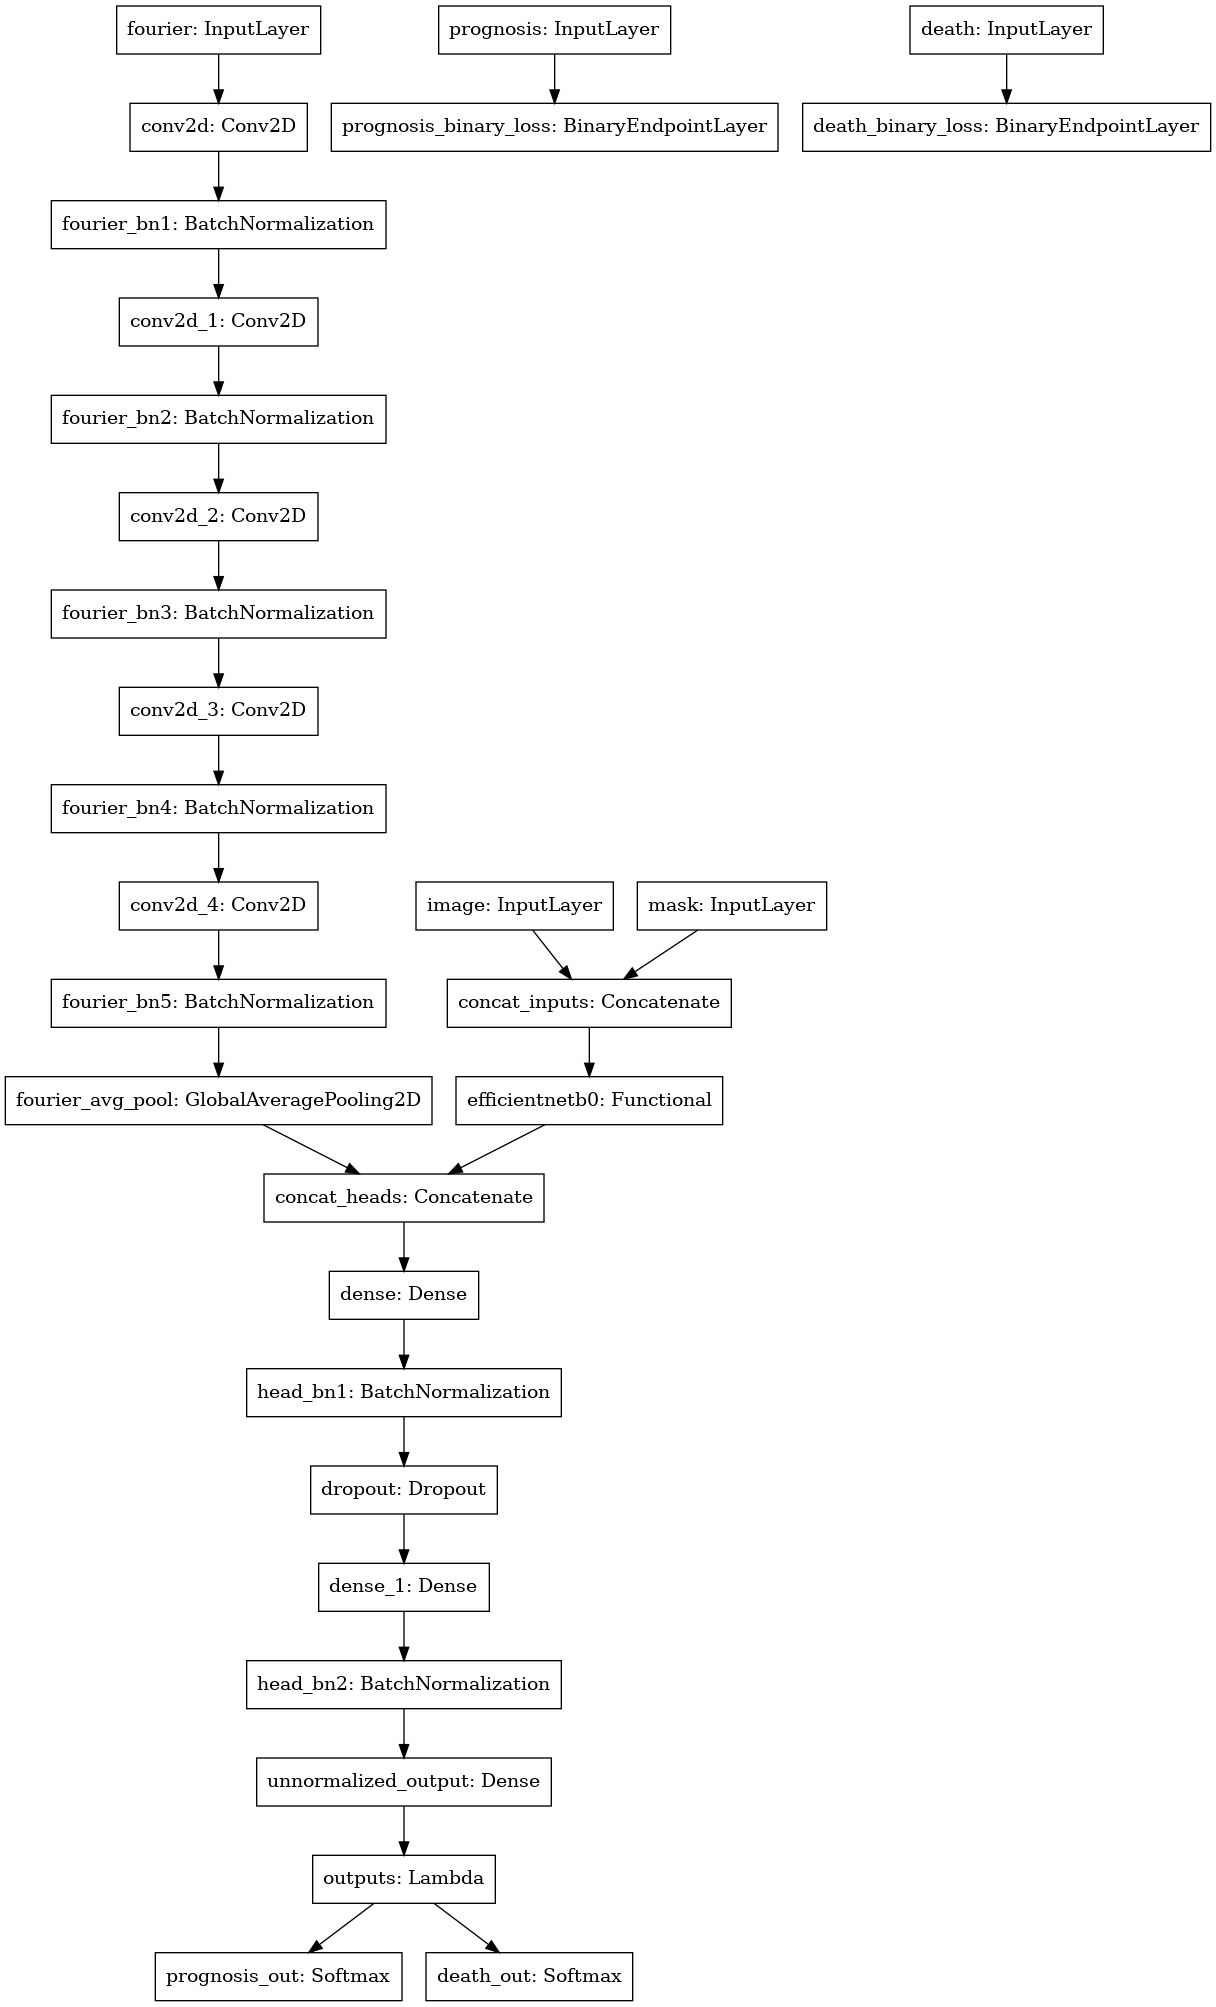

In [4]:
keras.utils.plot_model(model, to_file='image_model.png')

In [5]:
from src.base_model import build_model

cfg = compose(config_name='train_v2.yaml')
model = build_model(cfg)

/opt/miniconda/envs/ai4covid/lib/python3.6/site-packages/keras/applications/imagenet_utils.py:333: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  str(input_shape[-1]) + ' input channels.')


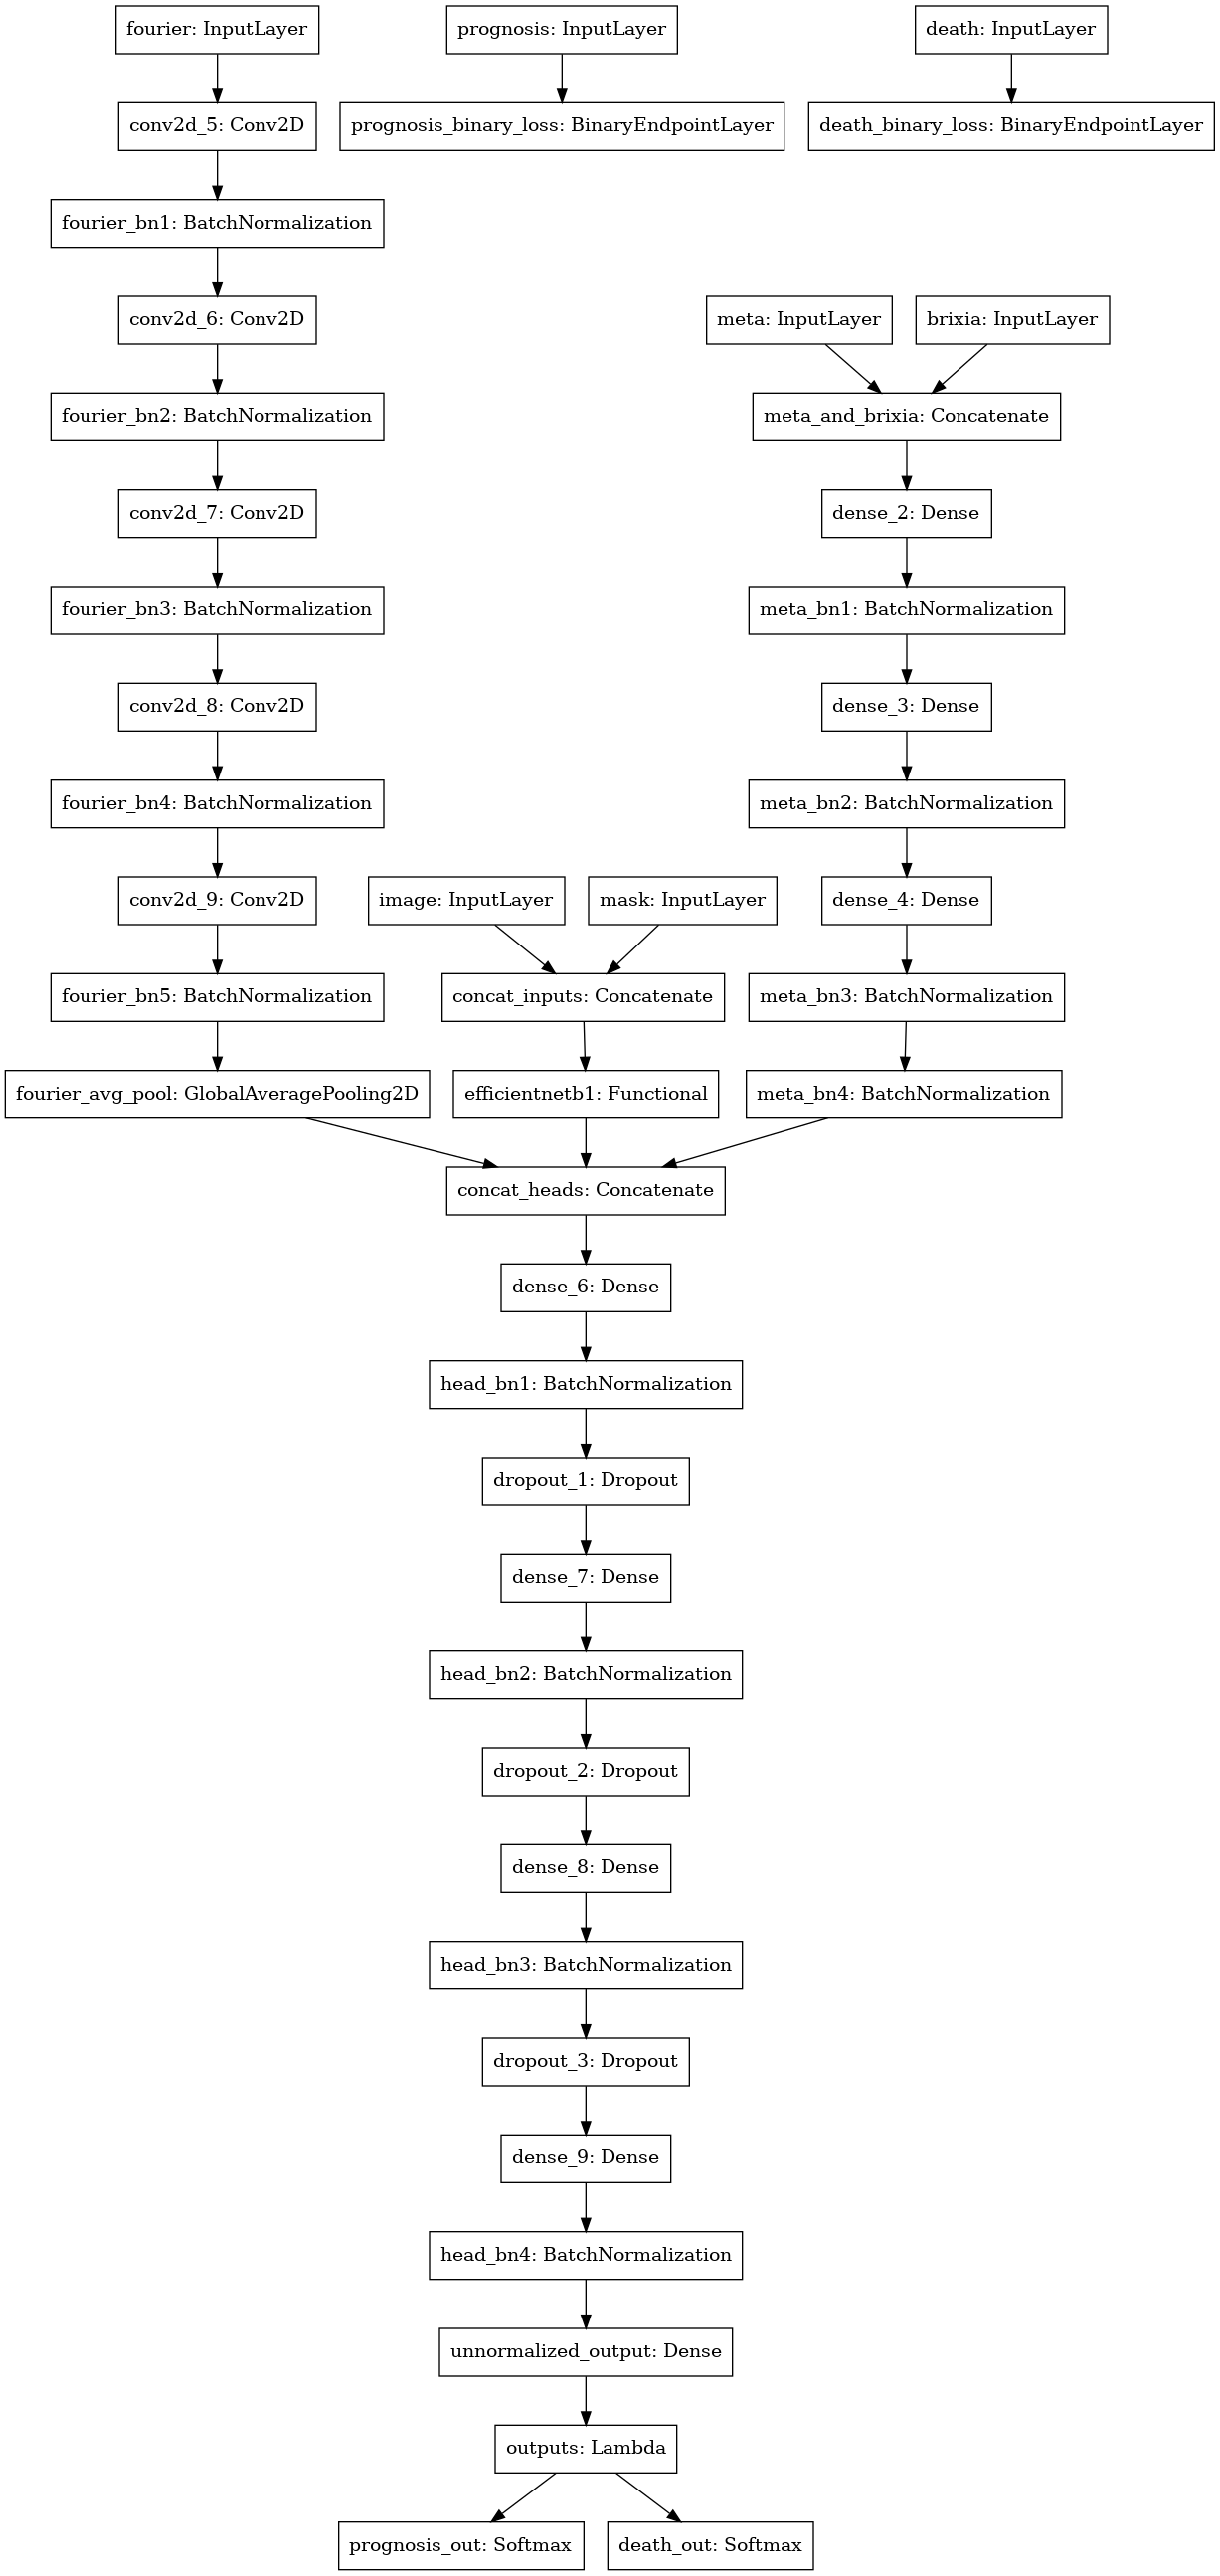

In [6]:
keras.utils.plot_model(model, to_file='image_w_meta_model.png')

In [8]:
from src.attention_model import build_xplainable_model

cfg = compose(config_name='train_xplain_v2.yaml')
model = build_xplainable_model(cfg)

/opt/miniconda/envs/ai4covid/lib/python3.6/site-packages/keras/applications/imagenet_utils.py:333: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  str(input_shape[-1]) + ' input channels.')


In [9]:
model.summary()

Model: "model_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
mask (InputLayer)               [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
concat_inputs (Concatenate)     (None, 512, 512, 2)  0           image[0][0]                      
                                                                 mask[0][0]                       
__________________________________________________________________________________________________
model (Functional)              (None, 16, 16, 1280) 4049281     concat_inputs[0][0]       

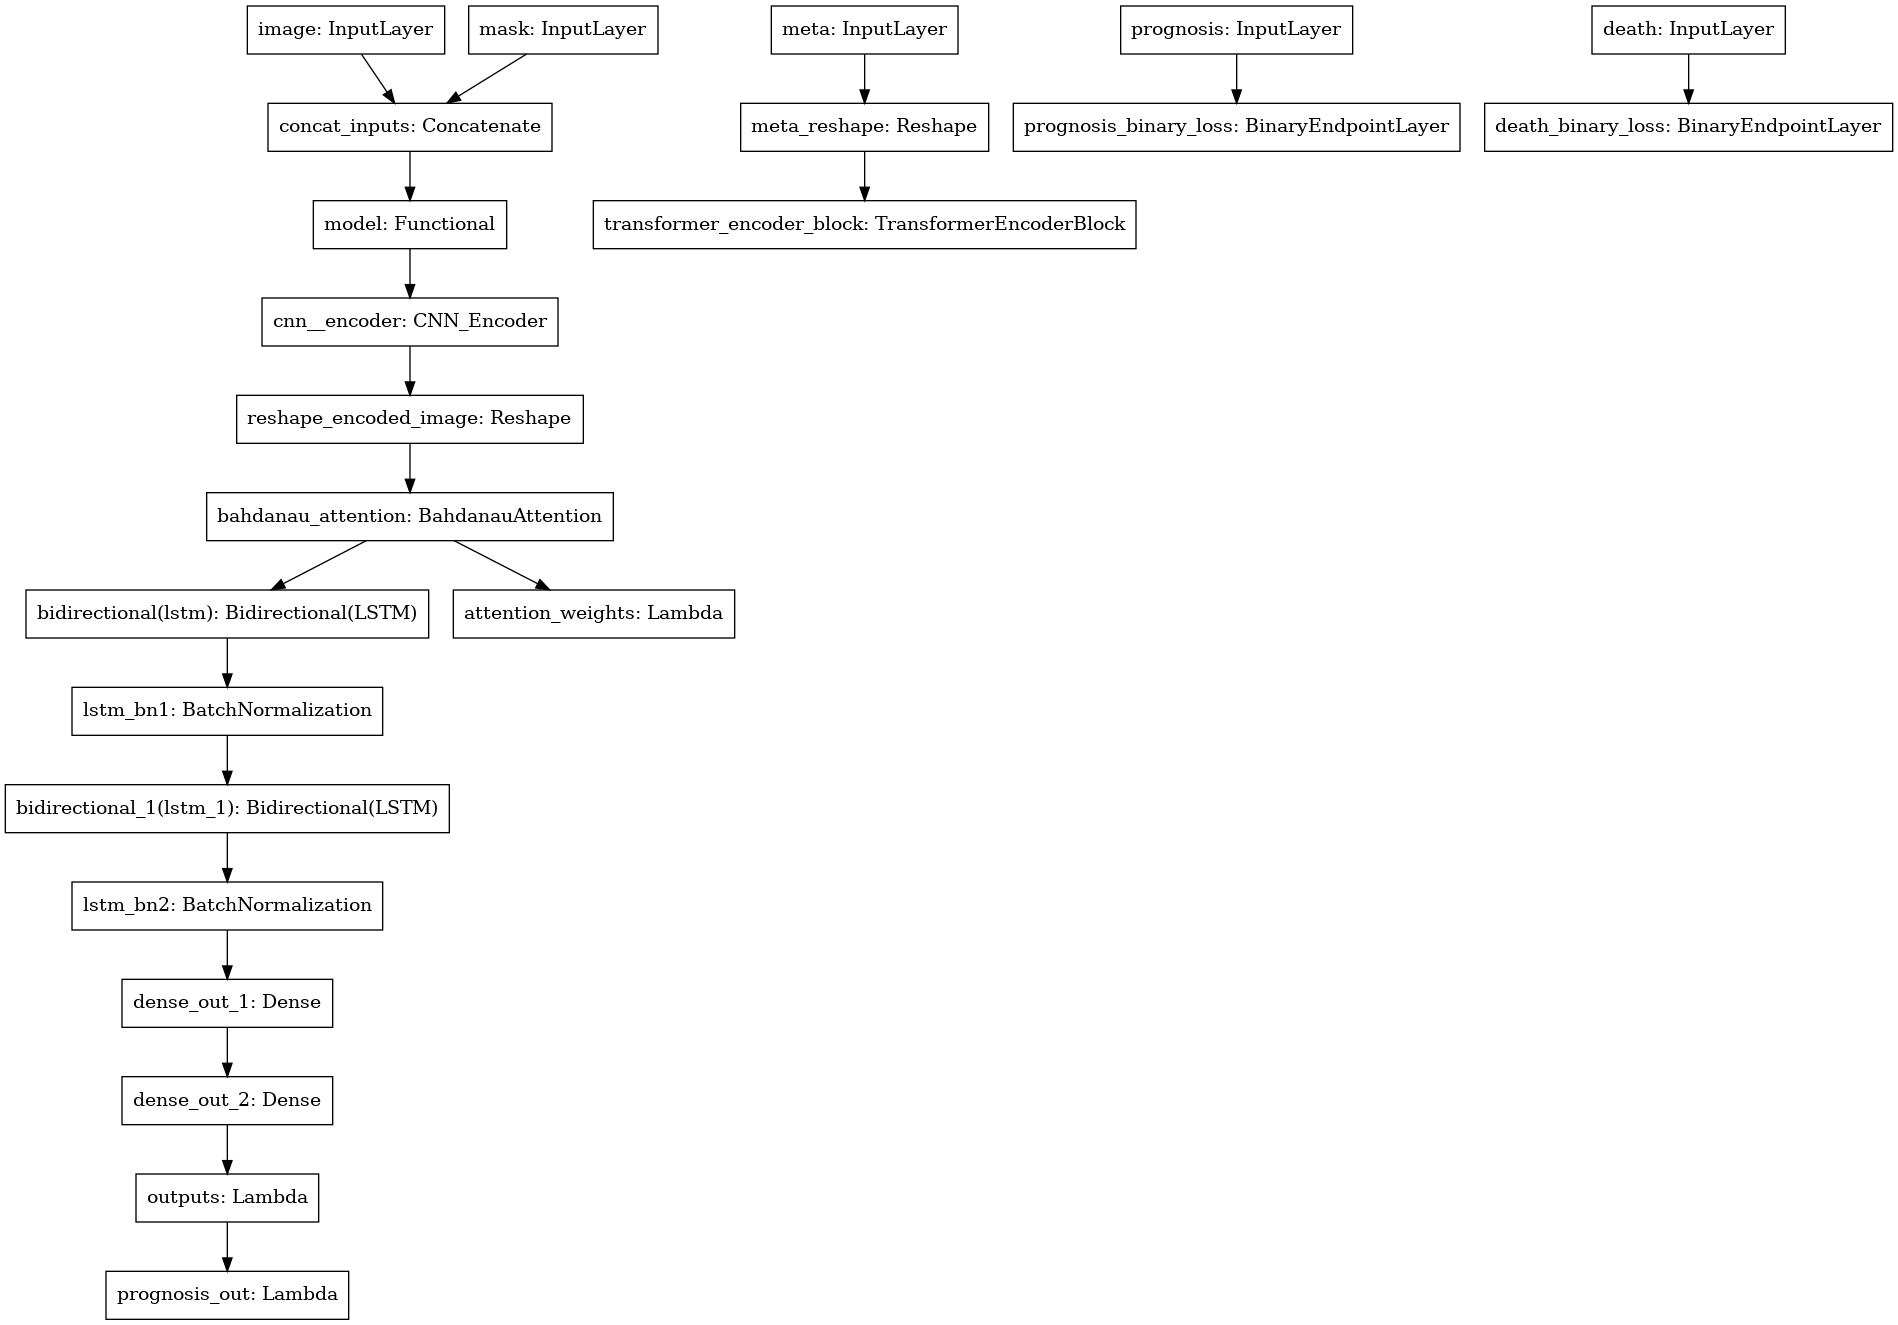

In [39]:
keras.utils.plot_model(model, to_file='xplainable_model.png') ## error in visualization